In [2]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
imdb.head()

AttributeError: module 'keras.api._v2.keras.datasets.imdb' has no attribute 'head'

In [4]:
# Getting reviews with words that come under 5000
# most occurring words in the entire
# corpus of textual review data
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(x_train[0])

17464789/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# Getting all the words from word_index dictionary
word_idx = imdb.get_word_index()

# Originally the index number of a value and not a key,
# hence converting the index as key and the words as values
word_idx = {i: word for word, i in word_idx.items()}

# again printing the review
print([word_idx[i] for i in x_train[0]])


1641221/1641221 [==============================] - 0s 0us/step
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', '

In [6]:
# Get the minimum and the maximum length of reviews
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))


Max length of a review::  2697
Min length of a review::  70


In [7]:
from tensorflow.keras.preprocessing import sequence

# Keeping a fixed length of all reviews to max 400 words
max_words = 400

x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]


In [8]:
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
                        embd_len,
                        input_length=max_words))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
                        activation='tanh',
                        return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the model
history = RNN_model.fit(x_train_, y_train_,
                        batch_size=64,
                        epochs=5,
                        verbose=1,
                        validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))


Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20608     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 180737 (706.00 KB)
Trainable params: 180737 (706.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
390/390 [==============================] - 85s 211ms/step - loss: 0.6908 - accuracy: 0.5290 - val_loss: 0.6917 - val_accuracy: 0.5312
Epoch 2/5
390/390 [==============================] - 81s 208ms/step - loss: 0.6556 - accuracy: 0.6063 - val_loss: 0.7056 - val_accu

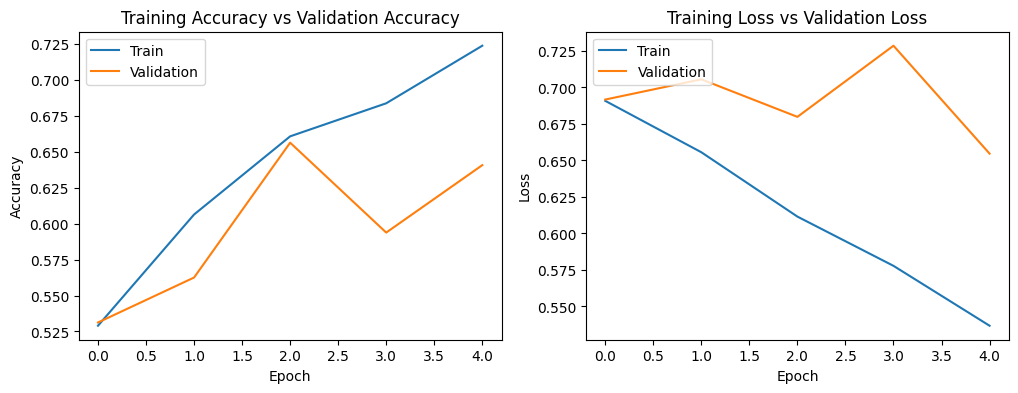

In [9]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [10]:
# Defining GRU model
gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(vocab_size,
                        embd_len,
                        input_length=max_words))
gru_model.add(GRU(128,
                  activation='tanh',
                  return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))

# Printing the Summary
print(gru_model.summary())

# Compiling the model
gru_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the GRU model
history2 = gru_model.fit(x_train_, y_train_,
                         batch_size=64,
                         epochs=5,
                         verbose=1,
                         validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("GRU model Score---> ", gru_model.evaluate(x_test, y_test, verbose=0))


Model: "GRU_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           160000    
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 222337 (868.50 KB)
Trainable params: 222337 (868.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
390/390 [==============================] - 286s 726ms/step - loss: 0.5191 - accuracy: 0.7346 - val_loss: 0.4576 - val_accuracy: 0.8281
Epoch 2/5
390/390 [==============================] - 279s 716ms/step - loss: 0.3098 - accuracy: 0.8714 - val_loss: 0.2276 - val_acc

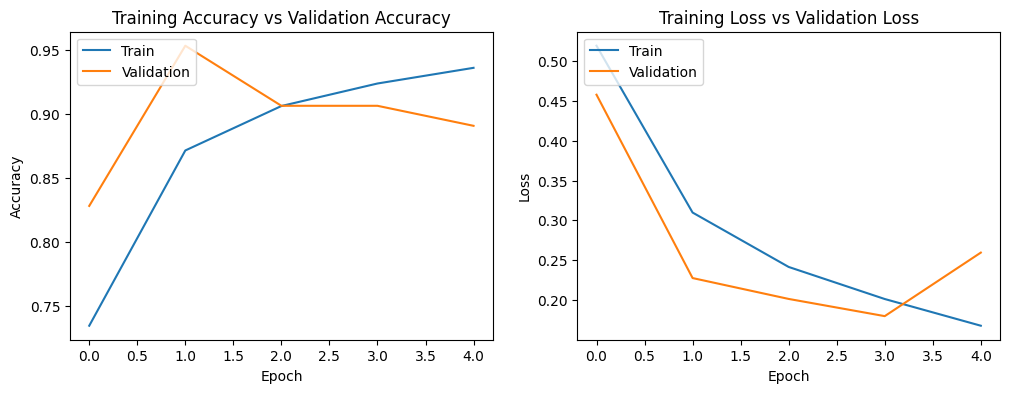

In [11]:
fig , ax = plt.subplots(1,2)
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history2.history['accuracy'])
ax[0].plot(history2.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# fixing every word's embedding size to be 32
embd_len = 32

# Defining LSTM model
lstm_model = Sequential(name="LSTM_Model")
lstm_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))
lstm_model.add(LSTM(128,
					activation='tanh',
					return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

# Printing Model Summary
print(lstm_model.summary())

# Use a smaller learning rate and gradient clipping in Adam optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
lstm_model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

# # Compiling the model
# lstm_model.compile(
# 	loss="binary_crossentropy",
# 	optimizer='adam',
# 	metrics=['accuracy']
# )

# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='loss', patience=2)

# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# lstm_model.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[early_stopping])

# Training the model
history3 = lstm_model.fit(x_train_, y_train_,
						batch_size=64,
						epochs=5,
						verbose=2,
						validation_data=(x_valid, y_valid))

# Displaying the model accuracy on test data
print()
print("LSTM model Score---> ", lstm_model.evaluate(x_test, y_test, verbose=0))


Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 32)           160000    
                                                                 
 lstm_3 (LSTM)               (None, 128)               82432     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 242561 (947.50 KB)
Trainable params: 242561 (947.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
390/390 - 152s - loss: 0.4789 - accuracy: 0.7709 - val_loss: 0.3424 - val_accuracy: 0.8438 - 152s/epoch - 390ms/step
Epoch 2/5
390/390 - 149s - loss: 0.3250 - accuracy: 0.8657 - val_loss: 0.2606 - val_accuracy: 0.9062 - 149s/epoch - 382ms/step
Epoch 3/5
390/390 - 1

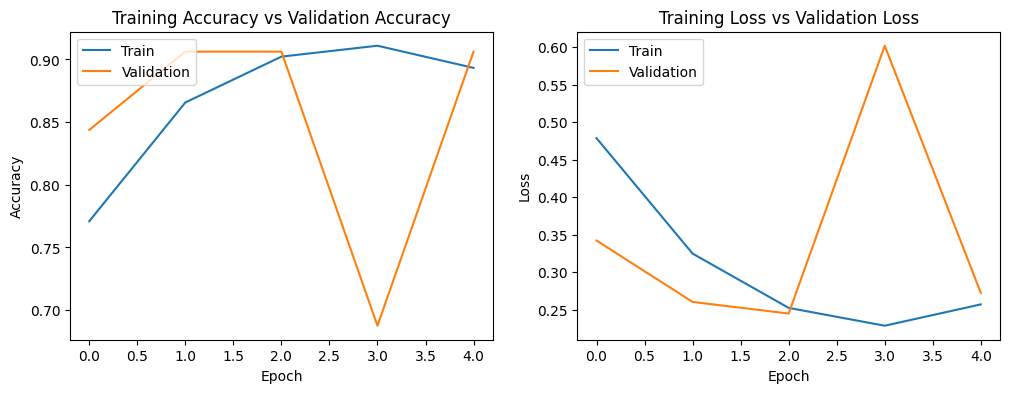

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history3.history['accuracy']
train_loss = history3.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history3.history['accuracy'])
ax[0].plot(history3.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history3.history['loss'])
ax[1].plot(history3.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(vocab_size,
							embd_len,
							input_length=max_words))
bi_lstm_model.add(Bidirectional(LSTM(128,
									activation='tanh',
									return_sequences=False)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_lstm_model.summary())

# Compiling model summary
bi_lstm_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

# Training the model
history4 = bi_lstm_model.fit(x_train_, y_train_,
							batch_size=64,
							epochs=5,
							verbose=2,
							validation_data=(x_test, y_test))

# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
	bi_lstm_model.evaluate(x_test, y_test, verbose=0))


Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 32)           160000    
                                                                 
 bidirectional (Bidirection  (None, 256)               164864    
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 325121 (1.24 MB)
Trainable params: 325121 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
390/390 - 794s - loss: 0.5048 - accuracy: 0.7480 - val_loss: 0.4774 - val_accuracy: 0.7680 - 794s/epoch - 2s/step
Epoch 2/5
390/390 - 786s - loss: 0.3273 - accuracy: 0.8643 - val_loss: 0.3657 - v

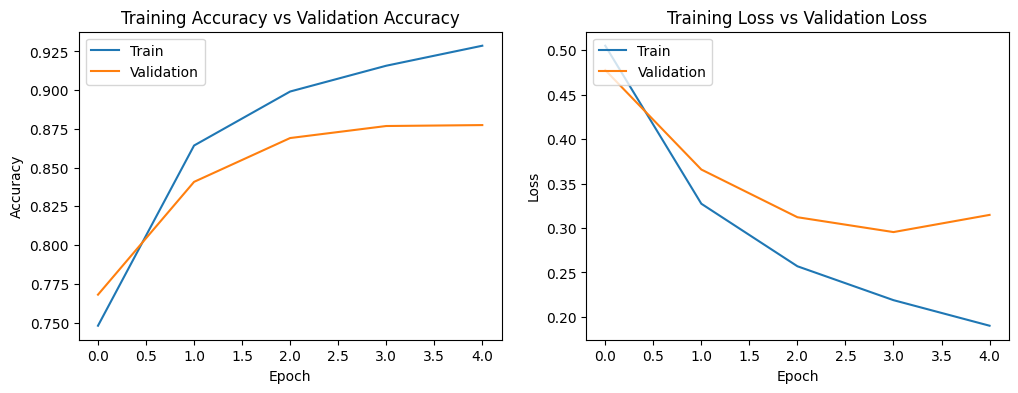

In [14]:
fig , ax = plt.subplots(1,2)
train_acc = history4.history['accuracy']
train_loss = history4.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history4.history['accuracy'])
ax[0].plot(history4.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history4.history['loss'])
ax[1].plot(history4.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

*Note*: Avoid using ReLu with RNN networks as it may lead to exploding gradients problems which could lead to nan problem (nan losses)

If you’re getting NaN losses during training, it could be due to several reasons. Here are a few things you might want to check:

1. Activation Function: You’re using ReLU as the activation function in your LSTM layer. While ReLU is great for feed-forward neural networks, it might not be the best choice for recurrent networks like LSTMs due to the possibility of exploding gradients, which could lead to NaN values. Try using tanh or sigmoid as the activation function in your LSTM layer.
2. Learning Rate: If the learning rate is too high, the model might overshoot the optimal point during training, leading to instability and NaN values. Try reducing the learning rate in your optimizer.
3. Gradient Clipping: This is a technique to prevent exploding gradients by setting a threshold value and scaling down the gradients if they exceed this threshold. You can add this to your optimizer with the clipvalue or clipnorm parameters.
4. Initialization: Poor initialization of weights can sometimes lead to NaN values. You might want to try different initialization methods.